<h1>Intro to Stats</h1> 
<h3>With an Anime Database Exporation Project</h3> 
<p>This project is going to explore concepts of descriptive statistics using a publicly available anime database, and python, with the main libraries being numpy, pandas and matplotlib.</p>

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
#data = pd.read_csv('data\\anime-dataset-2023.csv')  
data = pd.read_csv('data/anime-dataset-2023.csv')  
data.head()

pd.set_option('display.max_columns', None)

In [2]:
#Basic information about the dataset#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [3]:
#summary of numerical columns#

data.describe()


,anime_id,Popularity,Favorites,Members
count,24905.00,24905.00,24905.00,24905.00
mean,29776.71,12265.39,432.60,37104.96
std,17976.08,7187.43,4353.18,156825.24
min,1.00,0.00,0.00,0.00
25%,10507.00,6040.00,0.00,209.00
50%,34628.00,12265.00,1.00,1056.00
75%,45240.00,18491.00,18.00,9326.00
max,55735.00,24723.00,217606.00,3744541.00


There are colummns with number values writen as text instead of numbers, so we going to rewirte them as numbers 

In [4]:
new_data =['Score','Scored By','Members']
#droping unknow values of score, scored by and members
data['Score'] = pd.to_numeric(data['Score'], errors='coerce')
data['Scored By'] = pd.to_numeric(data['Scored By'], errors='coerce')
data['Members'] = pd.to_numeric(data['Members'], errors='coerce')
data.describe()

,anime_id,Score,Popularity,Favorites,Scored By,Members
count,24905.00,15692.00,24905.00,24905.00,15692.00,24905.00
mean,29776.71,6.38,12265.39,432.60,29974.38,37104.96
std,17976.08,0.93,7187.43,4353.18,116934.79,156825.24
min,1.00,1.85,0.00,0.00,100.00,0.00
25%,10507.00,5.73,6040.00,0.00,384.00,209.00
50%,34628.00,6.39,12265.00,1.00,1760.00,1056.00
75%,45240.00,7.06,18491.00,18.00,10855.50,9326.00
max,55735.00,9.10,24723.00,217606.00,2660903.00,3744541.00


In [5]:
#calculating the mean of the score, scored by and members
print('mean',data['Score'].mean())
print('median',data['Score'].median())
print('mode',data['Score'].mode()[0])
print('min',data['Score'].min())
print('max',data['Score'].max())
print('std',data['Score'].std())

mean 6.38088962528677
median 6.39
mode 6.31
min 1.85
max 9.1
std 0.9286960610287779


## Data Exploration


<Axes: title={'center': 'Average Score by Genre'}, xlabel='Genres'>

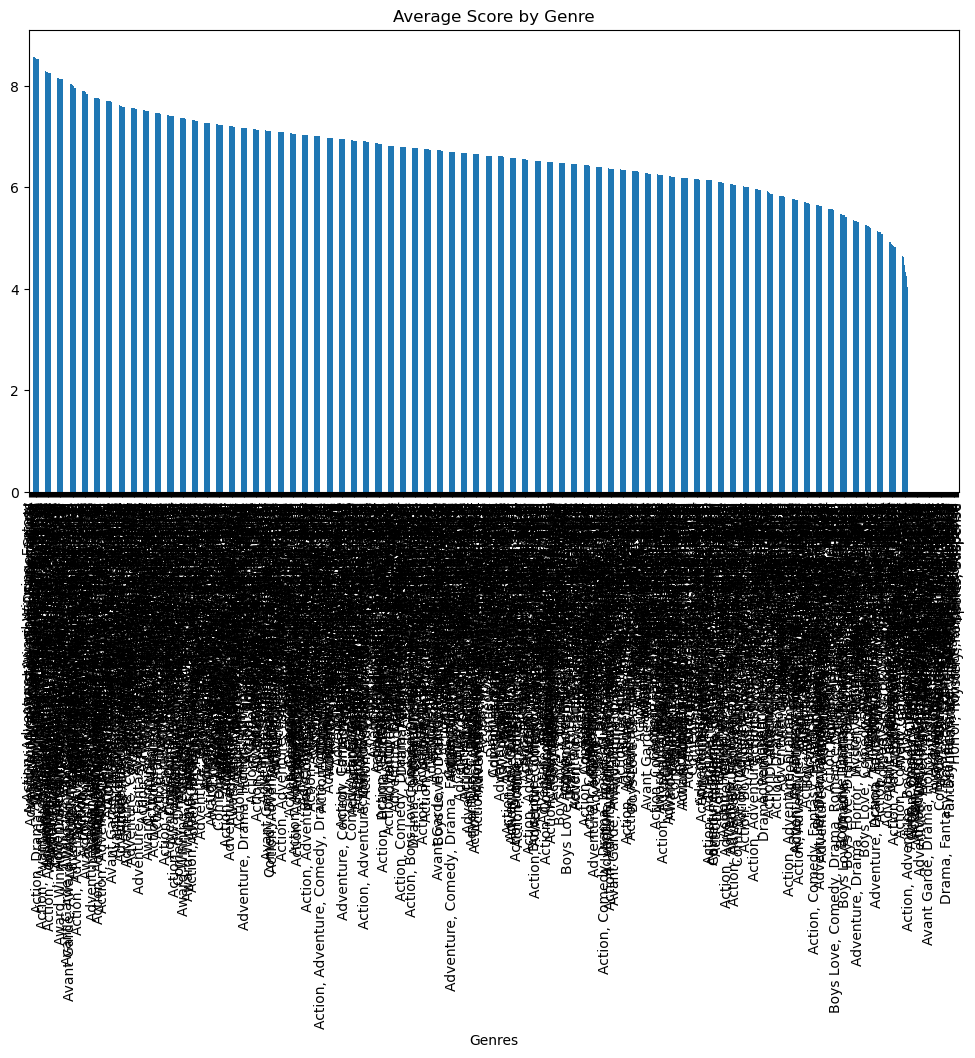

In [6]:
# Splitting genres into individual rows for accurate grouping
data_exploded = data.assign(Genre=data['Genres'].str.split(', ')).explode('Genres')

# Calculating the average score by genre
average_score_by_genre = data_exploded.groupby('Genres')['Score'].mean().sort_values(ascending=False)

# Plotting the average score by genre
average_score_by_genre.plot(kind='bar', figsize=(12, 6), title='Average Score by Genre')

In [7]:
#too many genres, need to clean up data
genres_count = data['Genres'].value_counts()
len(genres_count)

1006

In [8]:
data['Genres'] = data['Genres'].str.split(', ')  # Split genres into lists
data


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"[Action, Award Winning, Sci-Fi]","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.00,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"[Action, Sci-Fi]","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.00,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"[Action, Adventure, Sci-Fi]","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.00,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"[Action, Drama, Mystery, Supernatural]",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.00,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"[Adventure, Fantasy, Supernatural]",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.00,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,NaN,"[Comedy, Fantasy, Slice of Life]",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,NaN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,NaN,"[Action, Adventure, Fantasy]",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,NaN,"[Action, Adventure, Fantasy, Sci-Fi]",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,NaN,[UNKNOWN],A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,NaN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [9]:
anime_exploded = data.explode('Genres')  # Explode the list into separate rows
anime_exploded.head(10)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,Action,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.00,1771505,https://cdn.myanimelist.net/images/anime/4/196...
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,Award Winning,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.00,1771505,https://cdn.myanimelist.net/images/anime/4/196...
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,Sci-Fi,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.00,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,Action,"Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.00,360978,https://cdn.myanimelist.net/images/anime/1439/...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,Sci-Fi,"Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.00,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,Action,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.00,727252,https://cdn.myanimelist.net/images/anime/7/203...
2,6,Trigun,Trigun,トライガン,8.22,Adventure,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.00,727252,https://cdn.myanimelist.net/images/anime/7/203...
2,6,Trigun,Trigun,トライガン,8.22,Sci-Fi,"Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.00,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,Action,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.00,111931,https://cdn.myanimelist.net/images/anime/10/19...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,Drama,Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.00,111931,https://cdn.myanimelist.net/images/anime/10/19...


<Axes: title={'center': 'Average Score by Genre'}, xlabel='Genres'>

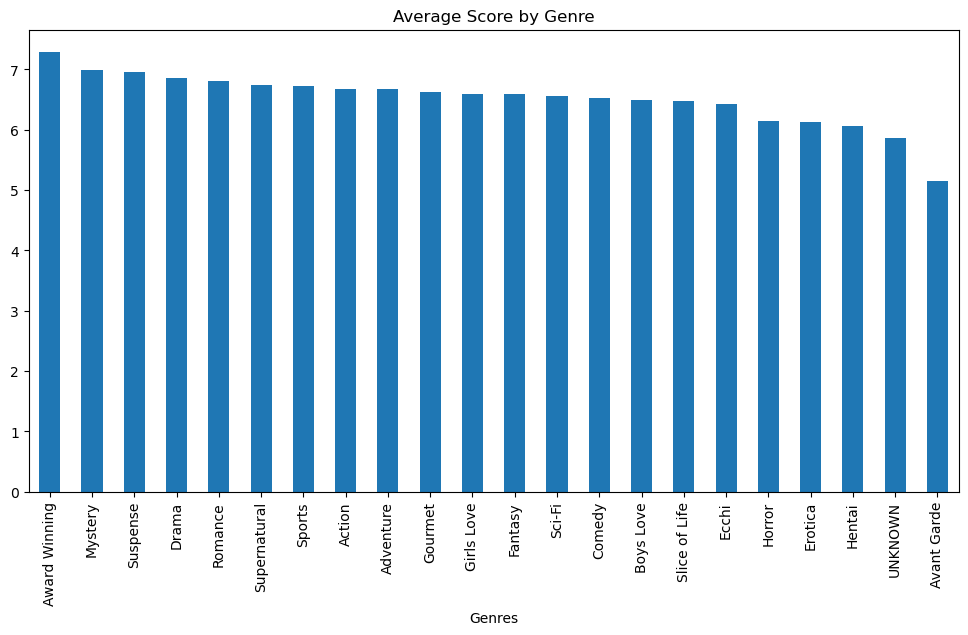

In [10]:
# Calculating the average score by genre
average_score_by_genre = anime_exploded.groupby('Genres')['Score'].mean().sort_values(ascending=False)

# Plotting the average score by genre
average_score_by_genre.plot(kind='bar', figsize=(12, 6), title='Average Score by Genre')

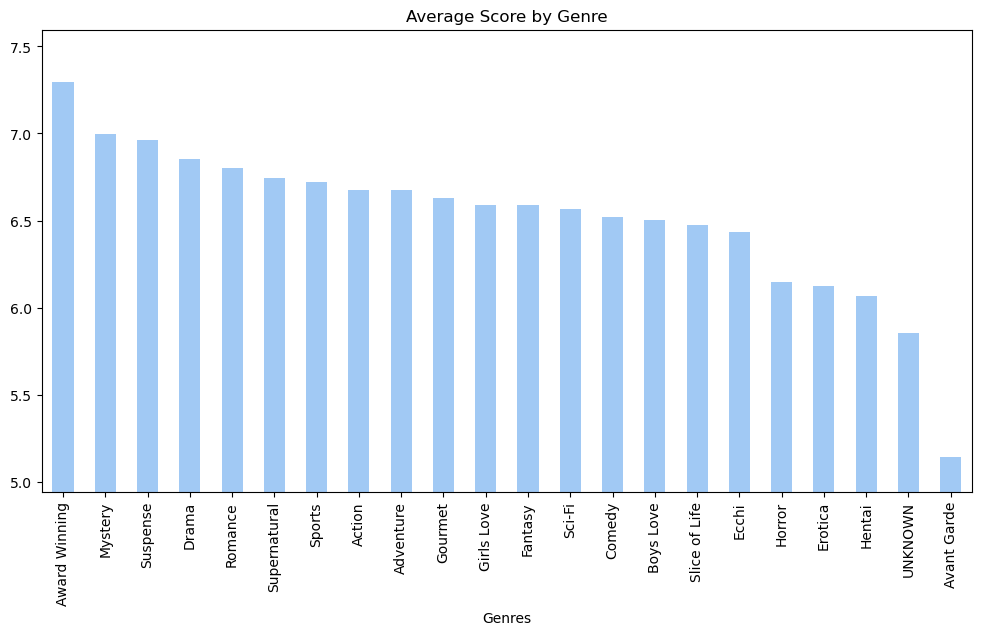

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# the scale of the y-axis is not appropriate
# Plotting the average score by genre
sns.set_palette("pastel") 
ax = average_score_by_genre.plot(kind='bar', figsize=(12, 6), title='Average Score by Genre')

# Set the scale for the y-axis (example: 0 to 10)
min_val = min(average_score_by_genre)
max_val = max(average_score_by_genre)
# Set the y-axis limits
ax.set_ylim(min_val-0.2, max_val+0.3)

# Optionally, set the scale for the x-axis if needed
# ax.set_xlim(0, 20)

# Show the plot
plt.show()

In [12]:
# Group by 'Genres' and count the number of entries for each genre
genre_counts = anime_exploded.groupby('Genres').size().reset_index(name='Count')

# order the bars by count
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

# Display the result
print(genre_counts)


           Genres  Count
5          Comedy   7142
9         Fantasy   5306
21        UNKNOWN   4929
0          Action   4730
1       Adventure   3842
16         Sci-Fi   3091
6           Drama   2836
15        Romance   2063
17  Slice of Life   1755
19   Supernatural   1494
12         Hentai   1486
14        Mystery    847
2     Avant Garde    804
7           Ecchi    795
18         Sports    771
13         Horror    534
20       Suspense    242
3   Award Winning    241
4       Boys Love    169
11        Gourmet    146
10     Girls Love    113
8         Erotica     54


<Figure size 1200x600 with 0 Axes>

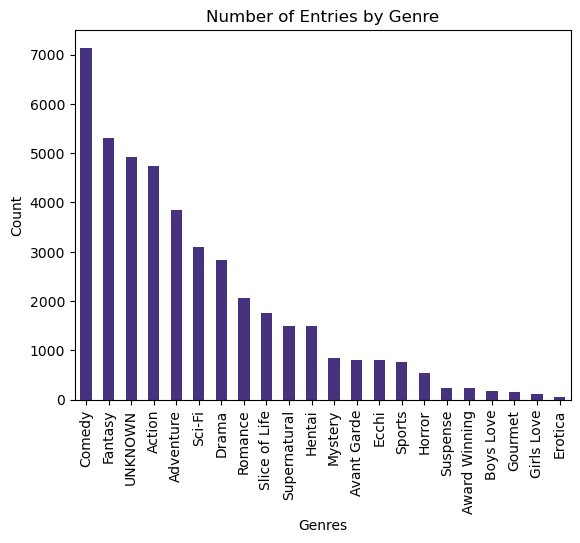

In [13]:
# Plotting the number of entries by genre
plt.figure(figsize=(12, 6))
sns.set_palette("viridis")
ax = genre_counts.plot(kind='bar', x='Genres', y='Count', legend=False)
# Set the title and labels
plt.title('Number of Entries by Genre')
plt.xlabel('Genres')
plt.ylabel('Count')

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

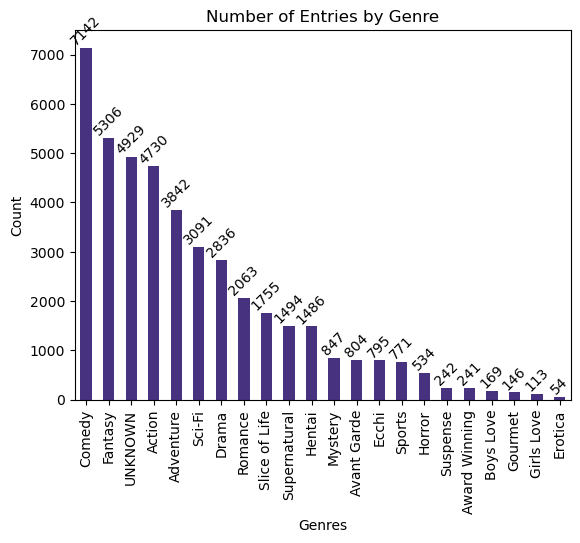

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the number of entries by genre
plt.figure(figsize=(12, 6))
sns.set_palette("viridis")
ax = genre_counts.plot(kind='bar', x='Genres', y='Count', legend=False)

# Set the title and labels
plt.title('Number of Entries by Genre')
plt.xlabel('Genres')
plt.ylabel('Count')

# Add count numbers on top of each bar
for i, count in enumerate(genre_counts['Count']):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', rotation=45, fontsize=10)

# Show the plot
plt.show()

In [ ]:
#exploring the UNKNOWN genre
unknown_anime = data_exploded[data_exploded['Genres'] == 'UNKNOWN']
# Display the first few rows of the unknown anime
unknown_anime = unknown_anime[['Name', 'Genres', 'Score', 'Scored By', 'Members']]
#sort by score
unknown_anime = unknown_anime.sort_values(by='Score', ascending=False)
unknown_anime.head(20)
# Display the number of unknown anime
#print("Number of unknown anime:", len(unknown_anime))

,Name,Genres,Score,Scored By,Members
24352,Idol,UNKNOWN,8.85,13810.00,19861
16184,Shoujo☆Kageki Revue Starlight Movie,UNKNOWN,8.55,6475.00,16202
21442,Karakai Jouzu no Takagi-san Movie,UNKNOWN,8.53,22363.00,58982
21001,Yoru ni Kakeru,UNKNOWN,8.36,11259.00,18038
15248,Kawaki wo Ameku,UNKNOWN,8.32,17824.00,28052
8672,Initial D Final Stage,UNKNOWN,8.28,68019.00,132248
15297,Girls & Panzer: Saishuushou Part 3,UNKNOWN,8.17,9026.00,23242
14610,Girls & Panzer: Saishuushou Part 2,UNKNOWN,8.06,15469.00,33061
23058,Tot Musica,UNKNOWN,8.04,1828.00,2953
16738,BanG Dream! Movie: Episode of Roselia - II: So...,UNKNOWN,8.02,2844.00,7562


<h3>Making Rank of Anime based on Score</h3> 

In [16]:
#printing all of the scores#
data['Score']

0       8.75
1       8.38
2       8.22
3       7.25
4       6.94
        ... 
24900    NaN
24901    NaN
24902    NaN
24903    NaN
24904    NaN
Name: Score, Length: 24905, dtype: float64

In [ ]:
#dropping NaN values
data_ranking = data.dropna(subset=['Score'])
data_ranking[['Name','Score','Studios']]

,Name,Score,Studios
0,Cowboy Bebop,8.75,Sunrise
1,Cowboy Bebop: Tengoku no Tobira,8.38,Bones
2,Trigun,8.22,Madhouse
3,Witch Hunter Robin,7.25,Sunrise
4,Bouken Ou Beet,6.94,Toei Animation
...,...,...,...
24590,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,5.99,"HMCH, Gravity Well"
24635,Slash,6.45,UNKNOWN
24729,The IDOLM@STER Cinderella Girls: U149 Recap,6.07,CygamesPictures
24831,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,6.29,UNKNOWN


In [ ]:
#Ordering the data by score
data_ranking = data_ranking.sort_values(by='Score',ascending=False)
#rest index
data_ranking = data_ranking.reset_index(drop=True)
data_ranking[['Name','Score','Studios']]

,Name,Score,Studios
0,Fullmetal Alchemist: Brotherhood,9.10,Bones
1,Steins;Gate,9.07,White Fox
2,Bleach: Sennen Kessen-hen,9.07,Pierrot
3,Gintama°,9.06,Bandai Namco Pictures
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05,A-1 Pictures
...,...,...,...
15687,Kokuhaku,2.30,UNKNOWN
15688,Tsui no Sora,2.22,UNKNOWN
15689,Hametsu no Mars,2.22,WAO World
15690,Utsu Musume Sayuri,1.98,UNKNOWN


In [ ]:
#All the worst scored anime are OVA or ONA
#Getting a list of unique types
data['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'UNKNOWN'],
      dtype=object)

In [ ]:
#going to filter the data by type
#Filtering the data by type
data_ranking = data_ranking[data_ranking['Type'] == ('TV' or 'Movie')]
data_ranking[['Name','Score','Studios']]

,Name,Score,Studios
0,Fullmetal Alchemist: Brotherhood,9.10,Bones
1,Steins;Gate,9.07,White Fox
2,Bleach: Sennen Kessen-hen,9.07,Pierrot
3,Gintama°,9.06,Bandai Namco Pictures
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05,A-1 Pictures
...,...,...,...
15659,Forest Fairy Five,3.30,UNKNOWN
15660,Pupa,3.29,Studio Deen
15661,Vampire Holmes,3.28,Studio! Cucuri
15672,Ladyspo,3.06,Brio Animation


In [26]:
#Create a new column 'rank' based on the 'Score' column
data_ranking['Rank'] = data_ranking['Score'].rank(ascending=False, method='min')    
# Sort the DataFrame by 'Rank' in ascending order
data_ranking = data_ranking.sort_values(by='Rank')
# Display the first few rows of the DataFrame
data_ranking[['Name', 'Score', 'Rank']].head(15)

,Name,Score,Rank
0,Fullmetal Alchemist: Brotherhood,9.10,1.00
1,Steins;Gate,9.07,2.00
2,Bleach: Sennen Kessen-hen,9.07,2.00
3,Gintama°,9.06,4.00
5,Shingeki no Kyojin Season 3 Part 2,9.05,5.00
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05,5.00
8,Hunter x Hunter (2011),9.04,7.00
7,Gintama',9.04,7.00
10,Gintama': Enchousen,9.03,9.00
12,Fruits Basket: The Final,9.00,10.00


In [ ]:
#filtering the first 200 of the rank
data_ranking = data_ranking[data_ranking['Rank'] <= 200]
data_ranking[['Name', 'Score', 'Rank']]

,Name,Score,Rank
0,Fullmetal Alchemist: Brotherhood,9.10,1.00
1,Steins;Gate,9.07,2.00
2,Bleach: Sennen Kessen-hen,9.07,2.00
3,Gintama°,9.06,4.00
5,Shingeki no Kyojin Season 3 Part 2,9.05,5.00
...,...,...,...
318,Re:Zero kara Hajimeru Isekai Seikatsu,8.23,200.00
314,Great Pretender,8.23,200.00
315,Ao Ashi,8.23,200.00
316,Major S3,8.23,200.00


In [28]:
data_ranking["Studios"].unique()

array(['Bones', 'White Fox', 'Pierrot', 'Bandai Namco Pictures',
       'Wit Studio', 'A-1 Pictures', 'Madhouse', 'Sunrise',
       'TMS Entertainment', 'Doga Kobo', 'Kyoto Animation', 'Shaft',
       'CloverWorks', 'Pierrot, Studio Signpost', 'MAPPA', 'ufotable',
       'Production I.G', 'Studio Deen', 'Artland', 'Tokyo Movie Shinsha',
       'Studio Bind', 'OLM, P.I.C.S.', 'Toei Animation', 'Kinema Citrus',
       "Brain's Base", 'Gainax', 'Shuka', 'Tatsunoko Production',
       'Wit Studio, CloverWorks', 'Madhouse, MAPPA', 'David Production',
       'OLM', 'J.C.Staff', 'C-Station', 'Manglobe', 'Lerche',
       'Hal Film Maker', 'Geno Studio', 'Zero-G', 'Shin-Ei Animation',
       'J.C.Staff, Egg Firm', 'Platinum Vision', 'Nippon Animation',
       'SynergySP', '8bit', 'Orange', 'SILVER LINK.', 'feel.',
       'Gainax, Tatsunoko Production', 'Nexus', 'Gallop, Studio Comet',
       "Brain's Base, Marvy Jack", 'Tezuka Productions, MAPPA', 'Gonzo',
       'Production I.G, Trans Arts', '

In [30]:
#groups  by studios to get a counter of the number of anime produced by each studio and and the average score
studio_ranking = data_ranking.groupby('Studios').agg({'Name': 'count', 'Score': 'mean'}).reset_index()
studio_ranking

,Studios,Name,Score
0,8bit,3,8.36
1,A-1 Pictures,11,8.49
2,A.C.G.T.,1,8.29
3,Artland,3,8.70
4,Bandai Namco Pictures,5,8.85
...,...,...,...
57,Wit Studio,8,8.58
58,"Wit Studio, CloverWorks",2,8.46
59,Zero-G,1,8.43
60,feel.,1,8.36


In [ ]:
#bar chat of the top 10 studios by number of anime produced
top_studios = studio_ranking.nlargest(10, 'Name')
top_studios

,Studios,Name,Score
25,Madhouse,18,8.51
38,Production I.G,13,8.43
1,A-1 Pictures,11,8.49
48,Sunrise,10,8.64
57,Wit Studio,8,8.58
5,Bones,7,8.60
6,Brain's Base,7,8.44
24,MAPPA,7,8.62
42,Shaft,7,8.59
61,ufotable,7,8.48


<Figure size 1200x600 with 0 Axes>

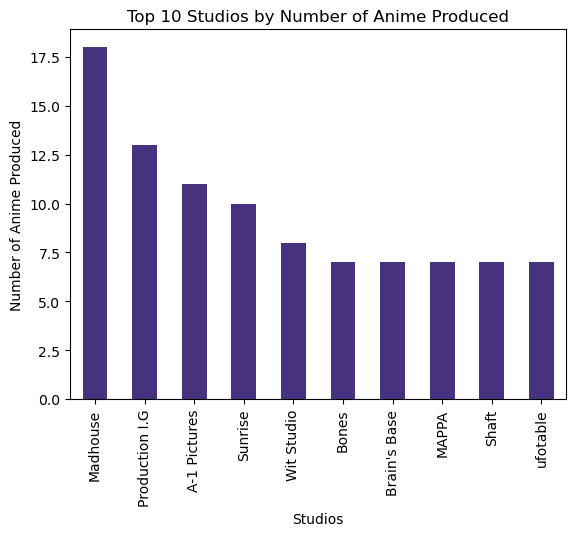

In [33]:
#bar chart of top studios
plt.figure(figsize=(12, 6))
sns.set_palette("viridis")
ax = top_studios.plot(kind='bar', x='Studios', y='Name', legend=False)
# Set the title and labels
plt.title('Top 10 Studios by Number of Anime Produced')
plt.xlabel('Studios')
plt.ylabel('Number of Anime Produced')
plt.show()

In [34]:
#top studios by average score
top_studios_score = studio_ranking.nlargest(10, 'Score')
top_studios_score

,Studios,Name,Score
11,Doga Kobo,1,8.98
4,Bandai Namco Pictures,5,8.85
36,"Pierrot, Studio Signpost",2,8.78
3,Artland,3,8.70
32,"OLM, P.I.C.S.",1,8.69
48,Sunrise,10,8.64
12,Gainax,1,8.63
24,MAPPA,7,8.62
52,Tatsunoko Production,1,8.62
5,Bones,7,8.60


<Figure size 1200x600 with 0 Axes>

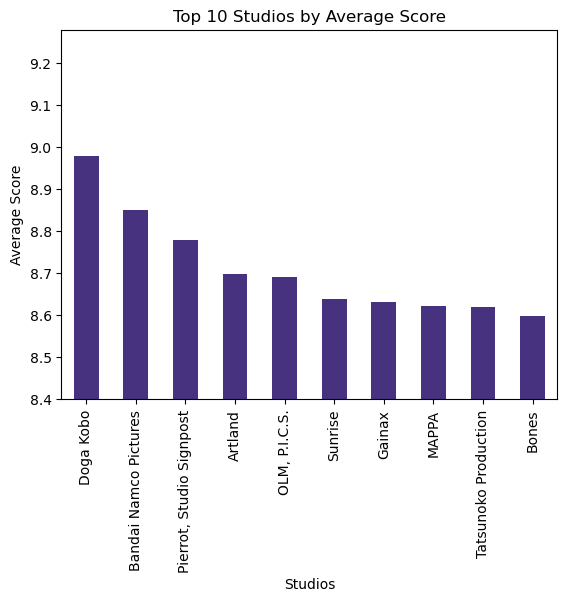

In [38]:
#bar chart of the top 10 studios by average score
plt.figure(figsize=(12, 6))
sns.set_palette("viridis")
ax = top_studios_score.plot(kind='bar', x='Studios', y='Score', legend=False)
# Set the scale for the y-axis (example: 0 to 10)
min_val = min(top_studios_score['Score'])
max_val = max(top_studios_score['Score'])
# Set the y-axis limits
ax.set_ylim(min_val-0.2, max_val+0.3)
# Set the title and labels
plt.title('Top 10 Studios by Average Score')
plt.xlabel('Studios')
plt.ylabel('Average Score')
plt.show()